Missing data train set:
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64
Missing data test set:
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64
Titles:
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: Title, dtype: int

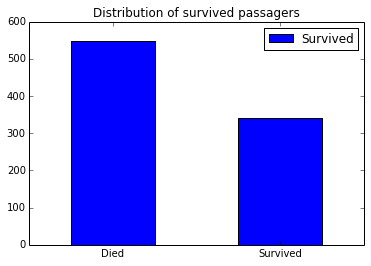

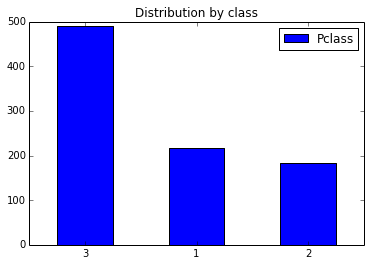

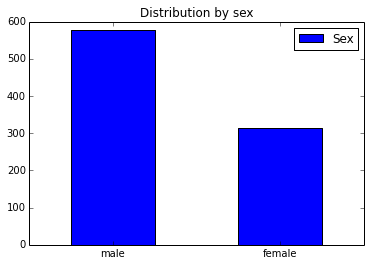

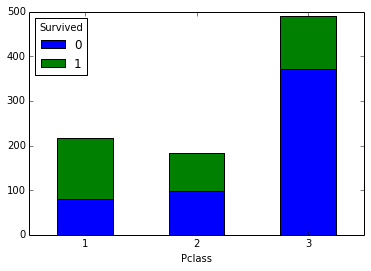

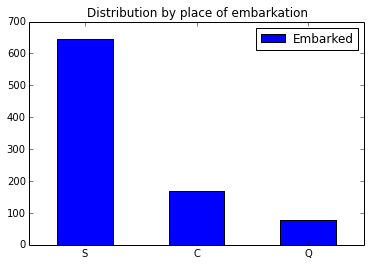

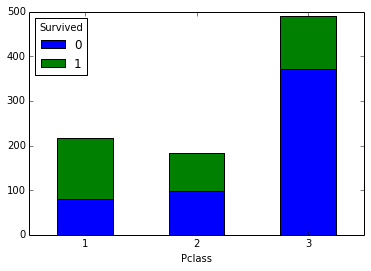

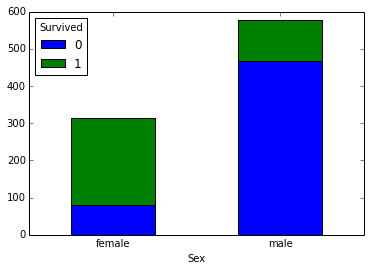

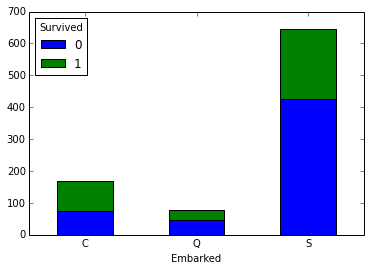

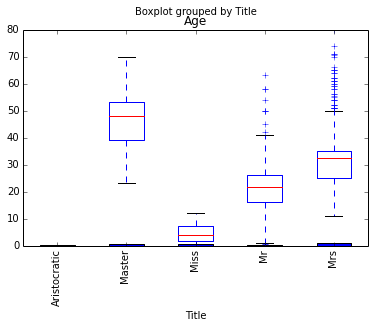

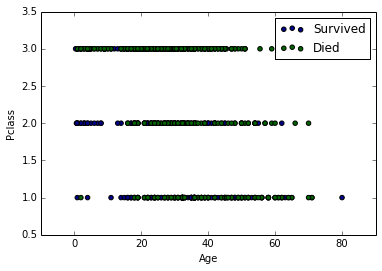

In [29]:
# do reload as top level
import research
reload(research)
from research import *

In [30]:
import random 
from sklearn.tree import DecisionTreeClassifier as DeciTree


train, mission = research.prepare_matrices()
# have to split train 80/20
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, data_train.Survived, test_size=0.2, random_state=0)

# criterion: gini (Gini impurity), entropy
# somehow we want a lot of forests!!!
solver = DeciTree()
solver.fit(X_train, y_train)

# have to look at feature importance

res = solver.predict(mission)
res = pd.DataFrame({"PassengerId": data_test.PassengerId, "Survived": res})
res.to_csv("../output/random_forest.csv", index=False)
print solver.score(X_test, y_test)

0.804469273743


In [31]:
# let's start with simple decision tree and make it work


In [39]:
import random

train, mission = research.prepare_matrices()
# have to split train 80/20
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, data_train.Survived, test_size=0.2, random_state=0)

# criterion: gini (Gini impurity), entropy
# somehow we want a lot of forests!!!
solver = RandForest(n_jobs=-1, n_estimators=100)
solver.fit(X_train, y_train)

# have to look at feature importance

res = solver.predict(mission)
res = pd.DataFrame({"PassengerId": data_test.PassengerId, "Survived": res})
res.to_csv("../output/random_forest.csv", index=False)
print solver.score(X_test, y_test)
print solver.feature_importances_ 

0.821229050279
[ 0.01961544  0.01559197  0.03418348  0.0138646   0.01441318  0.0102362
  0.10820357  0.18175627  0.22296343  0.20591591  0.03502277  0.0260292
  0.02007711  0.04637018  0.04575669]


In [33]:
# let's find out which passagers suck dick on the bottom of the sea
y_test_pred = solver.predict(X_test)


In [38]:
import random
from sklearn.grid_search import GridSearchCV


train, mission = research.prepare_matrices()
# have to split train 80/20
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, data_train.Survived, test_size=0.2, random_state=0)

# criterion: gini (Gini impurity), entropy
# somehow we want a lot of forests!!!
solver = RandForest(n_jobs=-1)

# i could probably try to change scoring function
param_grid = {
    'n_estimators': [100, 900],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_depth': [3,4,5]
}

cv_solver = GridSearchCV(estimator=solver, param_grid=param_grid, cv=10)
cv_solver.fit(train, data_train.Survived)

print cv_solver.best_params_

{'max_features': None, 'n_estimators': 100, 'max_depth': 5}


In [40]:
import random
from sklearn.grid_search import GridSearchCV


train, mission = research.prepare_matrices()
# criterion: gini (Gini impurity), entropy
# somehow we want a lot of forests!!!
solver = RandForest(n_jobs=-1)

# i could probably try to change scoring function
param_grid = {
    'n_estimators': [10, 50, 100],
}

cv_solver = GridSearchCV(estimator=solver, param_grid=param_grid, cv=10)
cv_solver.fit(train, data_train.Survived)

print cv_solver.best_params_

{'n_estimators': 50}


In [43]:
import random
from sklearn.cross_validation import cross_val_score

train, mission = research.prepare_matrices()
solver = RandForest(n_jobs=-1, n_estimators=1000)
solver.fit(train, data_train.Survived)

scores = cross_val_score(solver, train, data_train.Survived, cv=10)
print min(scores)

res = solver.predict(mission)
res = pd.DataFrame({"PassengerId": data_test.PassengerId, "Survived": res})
res.to_csv("../output/random_forest.csv", index=False)

0.752808988764
